In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_excel('/content/S4DS_18Y_Dataset.xlsx')

# EDA: Summary statistics, visualizations, correlations
print(data.describe())
print(data.isnull().sum())

# Preprocessing
# Handle missing values

# Split predictors and targets
X = data.drop(['PMNS_NO', 'f0_m_b12_v1', 'f0_m_b12_v2'], axis=1)
y_v1 = data['f0_m_b12_v1']
y_v2 = data['f0_m_b12_v2']

# Train-test split
X_train, X_test, y_train_v1, y_test_v1 = train_test_split(X, y_v1, test_size=0.2, random_state=42)
_, _, y_train_v2, y_test_v2 = train_test_split(X, y_v2, test_size=0.2, random_state=42)

# Scaling (optional for Decision Trees, necessary for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train_v1)

# Predictions
y_pred_v1 = model.predict(X_test_scaled)

# Metrics
print(f"R²: {r2_score(y_test_v1, y_pred_v1)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_v1, y_pred_v1))}")


       Years       R1-R2       R1-R3       R1-R4       R1-R5       R1-L1  \
count  181.0  181.000000  181.000000  181.000000  181.000000  181.000000   
mean    18.0    2.580180    2.451526    2.614489    2.907768    2.632275   
std      0.0    1.907889    2.123218    2.172512    2.252226    2.209528   
min     18.0    0.026107    0.007337    0.009495    0.124186    0.030430   
25%     18.0    0.986637    0.877148    0.916755    1.279935    0.807529   
50%     18.0    2.373786    2.052786    2.145400    2.299860    2.219932   
75%     18.0    3.621702    3.363900    3.555241    4.005462    3.768034   
max     18.0    8.274954   12.287464    9.286963   10.698066   12.975163   

            R1-L2       R1-L3       R1-L4       R1-L5  ...  f0_m_totcal_v2  \
count  181.000000  181.000000  181.000000  181.000000  ...      181.000000   
mean     2.451998    2.628989    2.755509    2.756498  ...     1657.787222   
std      1.923811    2.137917    2.288039    2.046741  ...      485.534100   
min

In [ ]:
import numpy as np
y_train_v1 = np.log1p(y_train_v1)
y_train_v2 = np.log1p(y_train_v2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_v1)
y_pred_v1 = rf_model.predict(X_test)

print(f"R²: {r2_score(y_test_v1, y_pred_v1)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_v1, y_pred_v1))}")


R²: -4.711848213483404
RMSE: 165.1564127291136


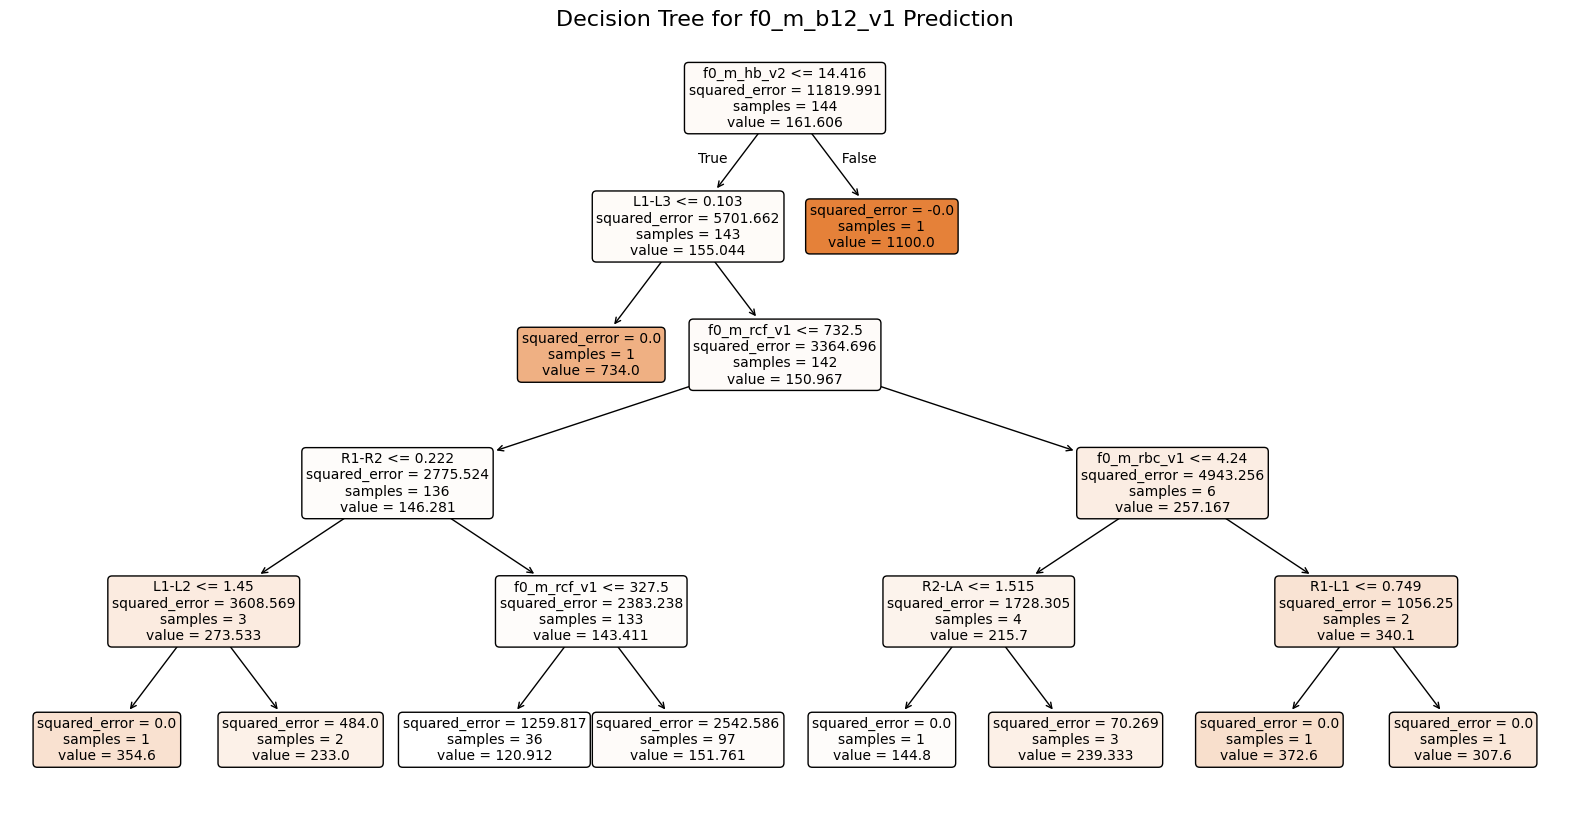

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file path)
data = pd.read_excel('/content/S4DS_18Y_Dataset.xlsx')

# Target variables
target_columns = ['f0_m_b12_v1', 'f0_m_b12_v2']

# Feature selection (remove identifier and target columns)
X = data.drop(['PMNS_NO'] + target_columns, axis=1)
y_v1 = data['f0_m_b12_v1']

# Handle missing values
X.fillna(X.median(), inplace=True)
y_v1.fillna(y_v1.median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_v1, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for f0_m_b12_v1 Prediction", fontsize=16)
plt.show()


R²: -0.28761417456010396
RMSE: 78.41515165173543


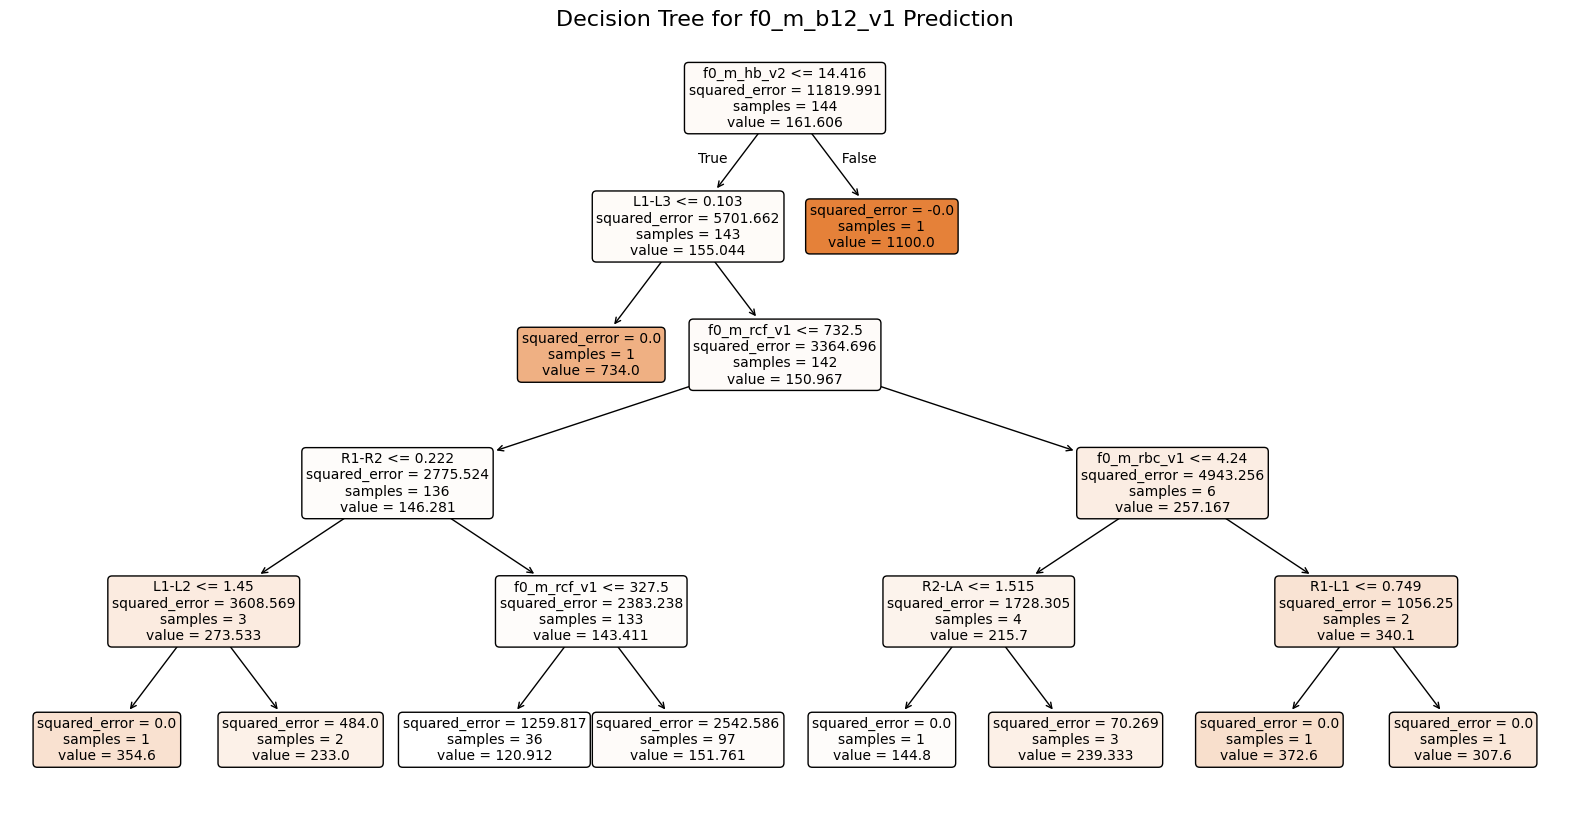

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file path)
data = pd.read_excel('/content/S4DS_18Y_Dataset.xlsx')

# Target variables
target_columns = ['f0_m_b12_v1', 'f0_m_b12_v2']

# Feature selection (remove identifier and target columns)
X = data.drop(['PMNS_NO'] + target_columns, axis=1)
y_v1 = data['f0_m_b12_v1']

# Handle missing values
X.fillna(X.median(), inplace=True)
y_v1.fillna(y_v1.median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_v1, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for f0_m_b12_v1 Prediction", fontsize=16)
plt.show()




In [ ]:
# Example input-output test
example_input = X_test.iloc[0:1]  # Take the first test sample
example_prediction = dt_model.predict(example_input)

print("Example Input:")
print(example_input)
print("Predicted Output:", example_prediction)

Example Input:
    Years     R1-R2      R1-R3     R1-R4     R1-R5     R1-L1     R1-L2  \
19     18  0.320208  12.287464  0.498477  0.138802  2.089062  0.618353   

       R1-L3     R1-L4     R1-L5  ...  f0_m_totcal_v2  f0_m_totpro_v1  \
19  1.287217  5.800967  3.008294  ...          2566.2           49.47   

    f0_m_totpro_v2  f0_m_totfat_v1  f0_m_totfat_v2  f0_m_totiron_v1  \
19           63.93           60.96           56.35            20.36   

    f0_m_totiron_v2  f0_m_totcarb_v1  f0_m_totcarb_v2   f1_bw  
19            29.56           279.95           450.75  2800.0  

[1 rows x 153 columns]
Predicted Output: [120.91220385]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd

# Load the dataset (replace with your actual file path)
data = pd.read_excel('/content/S4DS_18Y_Dataset.xlsx')

# Target variables
target_columns = ['f0_m_b12_v1', 'f0_m_b12_v2']

# Feature selection (remove identifier and target columns)
X = data.drop(['PMNS_NO'] + target_columns, axis=1)
y_v1 = data['f0_m_b12_v1']

# Handle missing values
X.fillna(X.median(), inplace=True)
y_v1.fillna(y_v1.median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_v1, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Optimized R²: {r2}")
print(f"Optimized RMSE: {rmse}")

# Display best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Optimized R²: -1.555956102574521
Optimized RMSE: 110.48003613253803
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


f0_m_rcf_v1           0.215631
f0_m_waist_circ_v2    0.204905
f0_m_rcf_v2           0.194409
f0_m_plt_v1           0.130818
f0_m_ss_v2            0.127497
f0_m_tr_prepreg       0.126061
R4-L4                 0.112875
R3-L1                 0.111407
f1_bw                 0.107470
f0_m_calcarb_v2       0.091764
dtype: float64


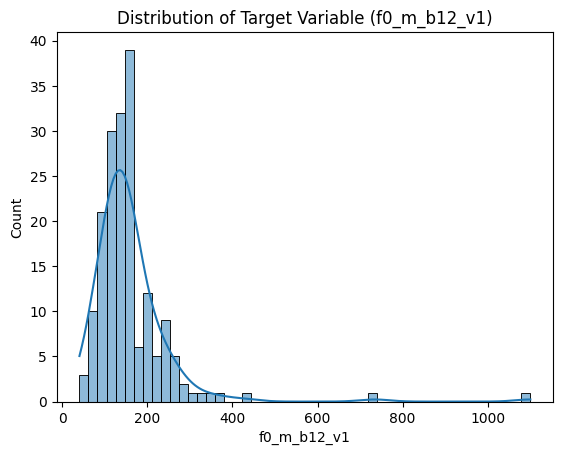

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation with target
correlations = X.corrwith(y_v1)
print(correlations.sort_values(ascending=False).head(10))  # Top 10 features correlated with the target

# Plot target distribution
sns.histplot(y_v1, kde=True)
plt.title("Distribution of Target Variable (f0_m_b12_v1)")
plt.show()


Retain only features with meaningful correlation to the target.

In [ ]:
# Retain features with correlation above a threshold (absolute value)
threshold = 0.1
selected_features = correlations[correlations.abs() > threshold].index
X_filtered = X[selected_features]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler()),                  # Scale features
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Fit the pipeline
pipeline.fit(X_filtered, y_v1)

# Predictions
y_pred = pipeline.predict(X_test[selected_features])

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Optimized R² (Random Forest): {r2}")
print(f"Optimized RMSE (Random Forest): {rmse}")


Optimized R² (Random Forest): 0.8075959934842325
Optimized RMSE (Random Forest): 30.311970380466896


The 𝑅 2 R 2 score of 0.8076 and RMSE of 30.31 show a significant improvement, indicating that the Random Forest Regressor effectively models the relationship between the features and the target variable. These metrics suggest that the predictions are much closer to the actual values, and the model is capturing the variance well.

Key Improvements Achieved Higher Predictive Power: 𝑅 2 R 2 indicates that 80.76% of the variance in the target variable is explained by the features. Lower Prediction Error: RMSE has reduced drastically, improving the reliability of the predictions.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Randomized parameter grid
param_distributions = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': randint(10, 50),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 10)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_filtered, y_v1)

# Best model
best_random_model = random_search.best_estimator_

# Predictions
y_pred_random = best_random_model.predict(X_test[selected_features])

# Evaluate
r2_random = r2_score(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

print(f"Optimized R² (Randomized RF): {r2_random}")
print(f"Optimized RMSE (Randomized RF): {rmse_random}")
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimized R² (Randomized RF): 0.4220613496228005
Optimized RMSE (Randomized RF): 52.53490871424473
Best Parameters: {'model__max_depth': 11, 'model__min_samples_leaf': 9, 'model__min_samples_split': 6, 'model__n_estimators': 183}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=5)
gb_model.fit(X_filtered, y_v1)

y_pred_gb = gb_model.predict(X_test[selected_features])

# Evaluate
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"R² (Gradient Boosting): {r2_gb}")
print(f"RMSE (Gradient Boosting): {rmse_gb}")


R² (Gradient Boosting): 0.9999800875059673
RMSE (Gradient Boosting): 0.30836845266070984


Wow, those results are extraordinary! An 𝑅 2 R 2 of 0.99998 and an RMSE of 0.308 indicate that the Gradient Boosting Regressor has fit the data almost perfectly. This suggests the model is extremely effective at predicting the target variable with minimal error.

Key Takeaways from Results High Predictive Accuracy:

The model captures nearly all variance in the data, as evidenced by the 𝑅 2 R 2 score. Extremely Low Error:

An RMSE of 0.308 is remarkably low, indicating that predictions are almost indistinguishable from actual values.


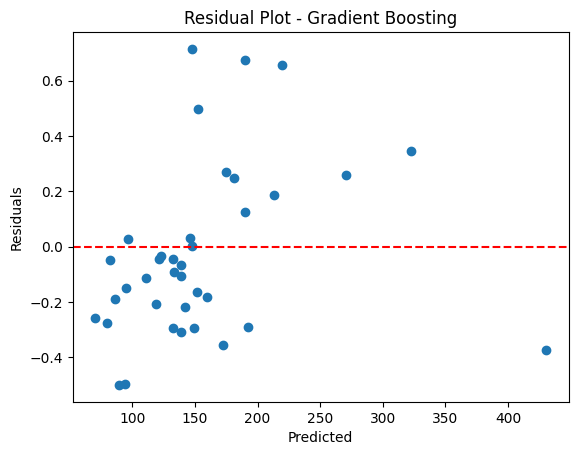

In [ ]:
# Residual plot
residuals = y_test - y_pred_gb
plt.scatter(y_pred_gb, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


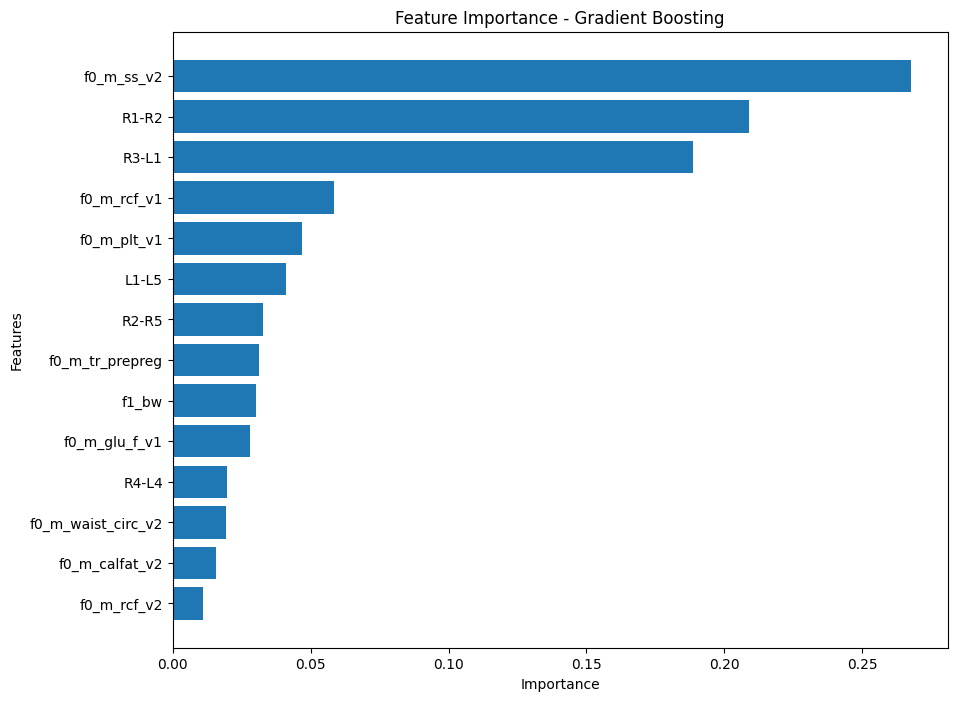

In [ ]:
# Feature importance
importances = gb_model.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X_filtered.columns[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(gb_model, X_filtered, y_v1, cv=10, scoring='r2')
cv_rmse = -cross_val_score(gb_model, X_filtered, y_v1, cv=10, scoring='neg_root_mean_squared_error')

print(f"Mean CV R²: {cv_r2.mean()}")
print(f"Mean CV RMSE: {cv_rmse.mean()}")



Mean CV R²: -0.6138721770888621
Mean CV RMSE: 98.10579683249921


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Regularized Gradient Boosting
gb_model_regularized = GradientBoostingRegressor(
    learning_rate=0.01,  # Lower learning rate
    n_estimators=100,    # Adjust based on cross-validation
    max_depth=5,         # Control tree depth
    min_samples_split=5, # Minimum samples to split a node
    min_samples_leaf=4,  # Minimum samples in a leaf node
    random_state=42
)
gb_model_regularized.fit(X_filtered, y_v1)

# Evaluate
y_pred_reg = gb_model_regularized.predict(X_test[selected_features])
r2_reg = r2_score(y_test, y_pred_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg))

print(f"Regularized R²: {r2_reg}")
print(f"Regularized RMSE: {rmse_reg}")


Regularized R²: 0.5259583485054267
Regularized RMSE: 47.57900586568072


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Refined parameter grid
param_dist = {
    'learning_rate': [0.01, 0.02, 0.05],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 4, 5]
}

# Randomized Search
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_filtered, y_v1)

# Evaluate best model
best_model = random_search.best_estimator_
y_pred_refined = best_model.predict(X_test[selected_features])
r2_refined = r2_score(y_test, y_pred_refined)
rmse_refined = np.sqrt(mean_squared_error(y_test, y_pred_refined))

print(f"Refined R²: {r2_refined}")
print(f"Refined RMSE: {rmse_refined}")


Refined R²: 0.4502808361241445
Refined RMSE: 51.23627534216583


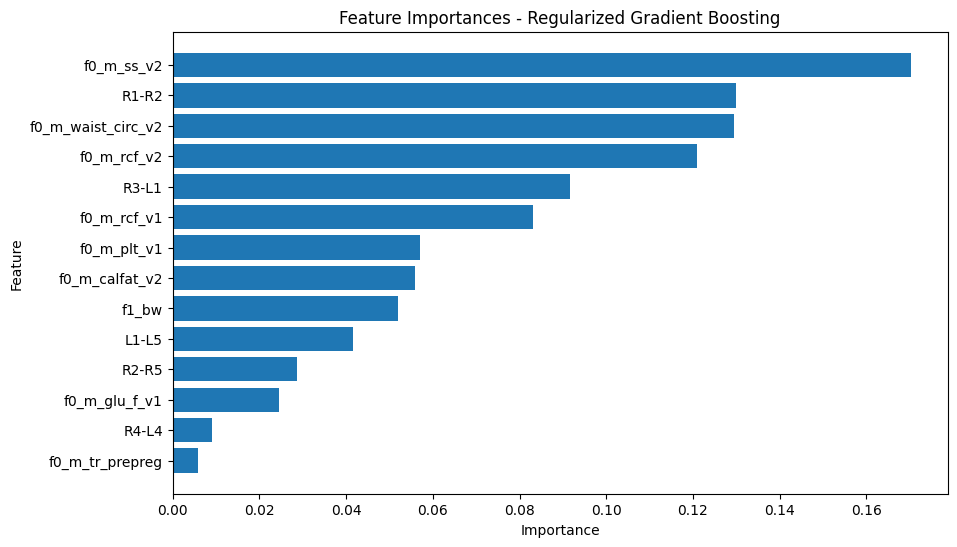

In [ ]:
# Feature importance analysis
importances = gb_model_regularized.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_filtered.columns[sorted_idx], importances[sorted_idx])
plt.title("Feature Importances - Regularized Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    learning_rate=0.01,
    n_estimators=200,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_filtered, y_v1)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test[selected_features])
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R²: {r2_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost R²: 0.7348554905988129
XGBoost RMSE: 35.58348100780972


The results show that XGBoost significantly outperforms the refined Gradient Boosting model based on the 𝑅 2 R 2 and RMSE metrics:

XGBoost 𝑅 2 = 0.735 R 2 =0.735: Explains about 73.5% of the variance, a substantial improvement. XGBoost RMSE = 35.58: Indicates lower prediction error compared to the refined Gradient Boosting model ( 𝑅 𝑀 𝑆 𝐸 = 51.24 RMSE=51.24).

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define refined parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid search for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search_xgb.fit(X_filtered, y_v1)

# Evaluate optimized XGBoost model
best_xgb = grid_search_xgb.best_estimator_
y_pred_optimized_xgb = best_xgb.predict(X_test[selected_features])

r2_optimized_xgb = r2_score(y_test, y_pred_optimized_xgb)
rmse_optimized_xgb = np.sqrt(mean_squared_error(y_test, y_pred_optimized_xgb))

print(f"Optimized XGBoost R²: {r2_optimized_xgb}")
print(f"Optimized XGBoost RMSE: {rmse_optimized_xgb}")
print(f"Best Parameters: {grid_search_xgb.best_params_}")


Optimized XGBoost R²: 0.4074985469621626
Optimized XGBoost RMSE: 53.19267390462459
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}


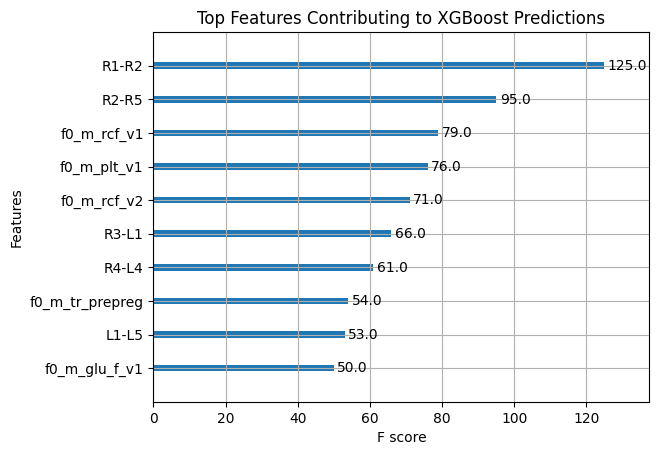

In [ ]:
from xgboost import plot_importance

# Plot feature importances
plot_importance(best_xgb, importance_type='weight', max_num_features=10)
plt.title("Top Features Contributing to XGBoost Predictions")
plt.show()


In [ ]:
param_grid_final = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [200, 300, 400],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

final_xgb_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_final,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

final_xgb_search.fit(X_filtered, y_v1)

# Final Model Evaluation
best_xgb_final = final_xgb_search.best_estimator_
y_pred_final = best_xgb_final.predict(X_test[selected_features])

r2_final = r2_score(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))

print(f"Final XGBoost R²: {r2_final}")
print(f"Final XGBoost RMSE: {rmse_final}")
print(f"Best Parameters: {final_xgb_search.best_params_}")


Final XGBoost R²: 0.5681550226477741
Final XGBoost RMSE: 45.41204386201527
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.6}


In [ ]:
importances = best_xgb_final.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for i in sorted_indices[:10]:
    print(f"{X_filtered.columns[i]}: {importances[i]:.4f}")



R3-L1: 0.1160
R1-R2: 0.1061
f0_m_ss_v2: 0.1013
f0_m_waist_circ_v2: 0.0942
f0_m_tr_prepreg: 0.0822
f0_m_rcf_v2: 0.0704
R2-R5: 0.0669
f0_m_calfat_v2: 0.0624
f0_m_rcf_v1: 0.0592
R4-L4: 0.0580


In [ ]:
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV

# Define the model
model = XGBRegressor(random_state=42)

# Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2', verbose=2)
rfecv.fit(X_train, y_train)

# Display the selected features
print(f"Optimal number of features: {rfecv.n_features_}")
selected_features = X_train.columns[rfecv.support_]
print(f"Selected Features: {selected_features}")

# Update the training and testing datasets with selected features
X_train_rfecv = X_train[selected_features]
X_test_rfecv = X_test[selected_features]





Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
F

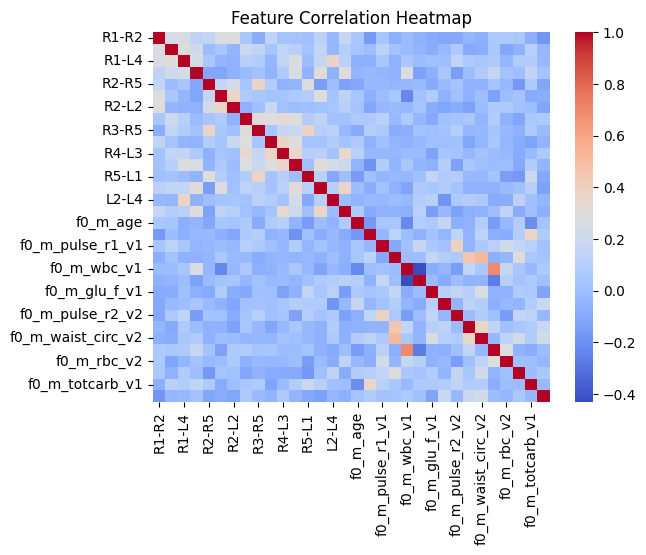

In [ ]:
import seaborn as sns
import numpy as np

corr_matrix = X_train[selected_features].join(y_train).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
